In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as obj:
    obj.extractall()

In [3]:
df = pd.read_csv('loan/loan.csv')
df.head()

/tmp/ipykernel_25850/2035651734.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(['id', 'member_id'], axis=1)

In [5]:
df.shape

(887379, 72)

### Goal
Predict loan status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  float64
 1   funded_amnt                  887379 non-null  float64
 2   funded_amnt_inv              887379 non-null  float64
 3   term                         887379 non-null  object 
 4   int_rate                     887379 non-null  float64
 5   installment                  887379 non-null  float64
 6   grade                        887379 non-null  object 
 7   sub_grade                    887379 non-null  object 
 8   emp_title                    835917 non-null  object 
 9   emp_length                   842554 non-null  object 
 10  home_ownership               887379 non-null  object 
 11  annual_inc                   887375 non-null  float64
 12  verification_status          887379 non-null  object 
 13 

#### Dropping 
-  open_acc_6m                  21372 non-null   float64
-  open_il_6m                   21372 non-null   float64
-  open_il_12m                  21372 non-null   float64
-  open_il_24m                  21372 non-null   float64
-  mths_since_rcnt_il           20810 non-null   float64
-  total_bal_il                 21372 non-null   float64
-  il_util                      18617 non-null   float64
-  open_rv_12m                  21372 non-null   float64
-  open_rv_24m                  21372 non-null   float64
-  max_bal_bc                   21372 non-null   float64
-  all_util                     21372 non-null   float64
-  total_rev_hi_lim             817103 non-null  float64
-  inq_fi                       21372 non-null   float64
-  total_cu_tl                  21372 non-null   float64
-  inq_last_12m                 21372 non-null   float64
-  annual_inc_joint             511 non-null     float64
-  dti_joint                    509 non-null     float64
-  verification_status_joint    511 non-null     object 

In [7]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_

### Percent of missing data

In [8]:
miss = df.isnull().sum()*100/len(df)

In [9]:
miss.sort_values(ascending=False).head(21)

dti_joint                      99.942640
verification_status_joint      99.942415
annual_inc_joint               99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
open_acc_6m                    97.591559
open_il_6m                     97.591559
open_il_12m                    97.591559
open_il_24m                    97.591559
total_bal_il                   97.591559
inq_last_12m                   97.591559
open_rv_12m                    97.591559
open_rv_24m                    97.591559
max_bal_bc                     97.591559
all_util                       97.591559
inq_fi                         97.591559
total_cu_tl                    97.591559
desc                           85.797951
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
dtype: float64

<Axes: xlabel='count', ylabel='loan_status'>

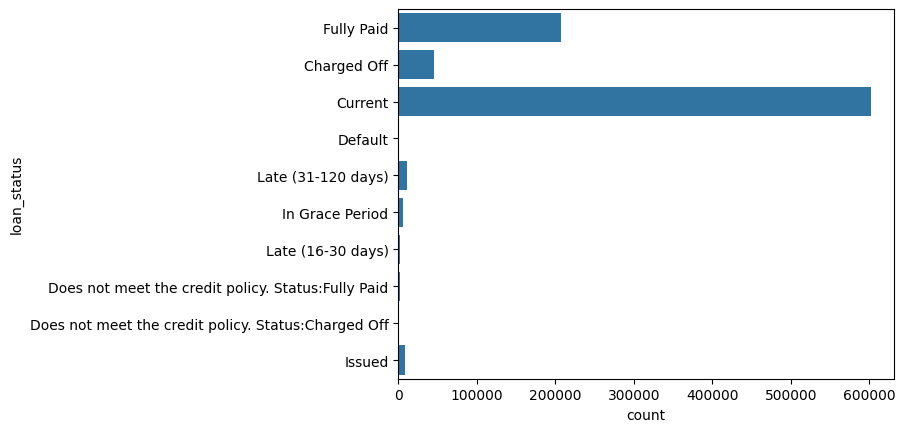

In [10]:
sns.countplot(df['loan_status'])

In [11]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [12]:
def risky(loan_status):
    risk_group = [ 'Charged Off', 'Default','Late (31-120 days)', 
             'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off']
    
    not_risk_group = ['Does not meet the credit policy. Status:Fully Paid', 'Current', 'Fully Paid' ]
    if loan_status in risk_group:
        return 1
    elif loan_status in not_risk_group:
        return 0

df.loan_status = df.loan_status.apply(risky)

In [13]:
df.loan_status.value_counts()

loan_status
0.0    811490
1.0     67429
Name: count, dtype: int64

In [14]:
missing_lot = ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'total_bal_il', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'inq_last_12m', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq', 'loan_status']
df_new = df[missing_lot].copy()

In [15]:
# sns.pairplot(df_new, hue='loan_status')

In [16]:
df.mths_since_last_major_derog

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
887374     NaN
887375    29.0
887376     NaN
887377    22.0
887378     NaN
Name: mths_since_last_major_derog, Length: 887379, dtype: float64

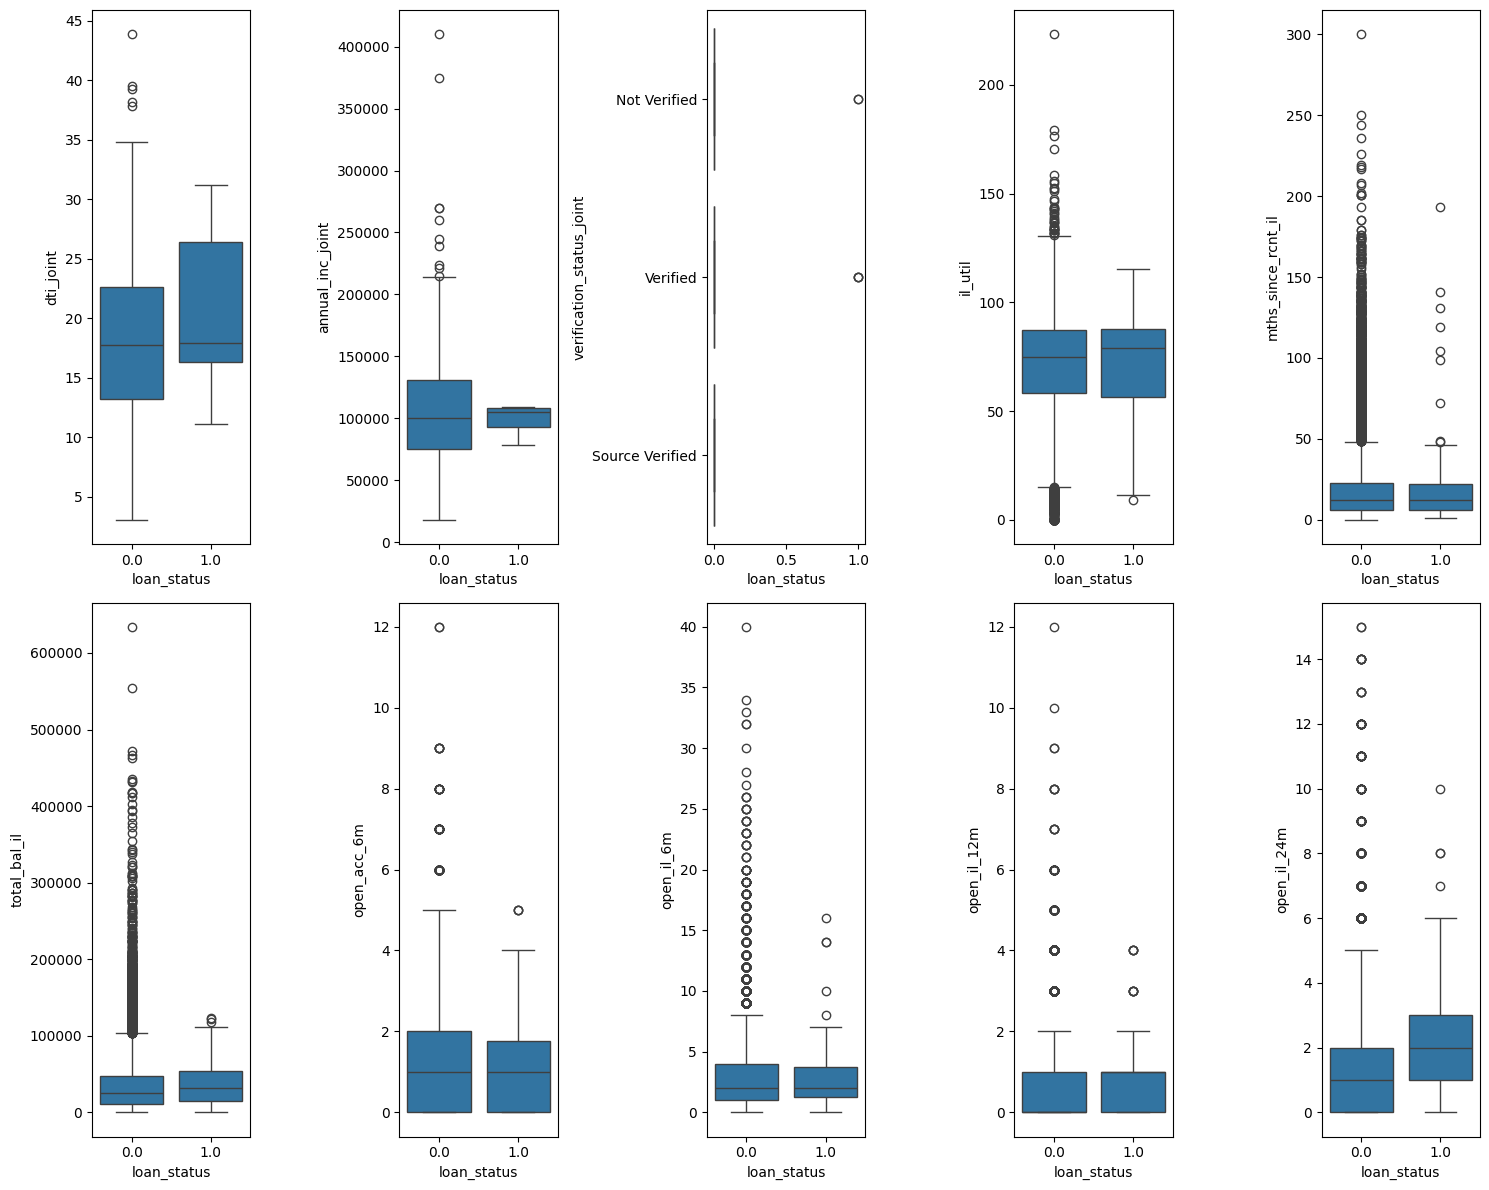

In [17]:
# nums = [i for i in range(21)]
# missing_lot_no = list(zip(missing_lot[:-1], nums))
nums = [i for i in range(10)]
missing_lot_no = list(zip(missing_lot[:-1], nums))

fig, axes = plt.subplots(2, 5, figsize=(15,12))
axes = axes.ravel()
for att, i in missing_lot_no:
        # print(att)
        ax = axes[i]
        sns.boxplot(x='loan_status', y=att, data=df, ax=ax)
       
plt.tight_layout()
plt.show()

In [18]:
nums = [i for i in range(11)]
missing_lot_no = list(zip(missing_lot[10:-1], nums))
print(missing_lot_no)

[('inq_last_12m', 0), ('open_rv_12m', 1), ('open_rv_24m', 2), ('max_bal_bc', 3), ('all_util', 4), ('inq_fi', 5), ('total_cu_tl', 6), ('desc', 7), ('mths_since_last_record', 8), ('mths_since_last_major_derog', 9), ('mths_since_last_delinq', 10)]


In [19]:
# nums = [i for i in range(10)]
# missing_lot_no = list(zip(missing_lot[11:-1], nums))

# fig, axes = plt.subplots(2, 5, figsize=(15,12))
# axes = axes.ravel()
# for att, i in missing_lot_no:
#         # print(att)
#         ax = axes[i]
#         sns.boxplot(x='loan_status', y=att, data=df, ax=ax)
       
# plt.tight_layout()
# plt.show()

In [20]:
missing_lot.pop()

'loan_status'

In [21]:
df2 = df.drop(missing_lot, axis = 1).copy()

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   funded_amnt                 887379 non-null  float64
 2   funded_amnt_inv             887379 non-null  float64
 3   term                        887379 non-null  object 
 4   int_rate                    887379 non-null  float64
 5   installment                 887379 non-null  float64
 6   grade                       887379 non-null  object 
 7   sub_grade                   887379 non-null  object 
 8   emp_title                   835917 non-null  object 
 9   emp_length                  842554 non-null  object 
 10  home_ownership              887379 non-null  object 
 11  annual_inc                  887375 non-null  float64
 12  verification_status         887379 non-null  object 
 13  issue_d       

In [23]:
df2.isnull().sum()*100/len(df2)

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.799326
emp_length                     5.051393
home_ownership                 0.000000
annual_inc                     0.000451
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.953369
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.017242
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.003268
earliest_cr_line               0.003268
inq_last_6mths                 0.003268


In [24]:
def numeric_categorical(df):
    numeric_cols = df.select_dtypes(include='number').columns
    categorical_cols = df.select_dtypes(exclude='number').columns
    return numeric_cols, categorical_cols



In [25]:
numerical, categorical = numeric_categorical(df2)
numerical

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [26]:
df2[numerical]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,0.0,27.65,0.0,1.0,...,0.00,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.0,1.00,0.0,5.0,...,0.00,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,0.0,8.72,0.0,2.0,...,0.00,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,0.0,20.00,0.0,1.0,...,16.97,0.00,0.00,357.48,0.0,1.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,0.0,17.94,0.0,0.0,...,0.00,0.00,0.00,67.79,0.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,11.99,332.10,31000.0,0.0,28.69,0.0,0.0,...,0.00,0.00,0.00,332.10,0.0,1.0,0.0,0.0,25274.0,17100.0
887375,24000.0,24000.0,24000.0,11.99,797.03,79000.0,0.0,3.90,0.0,1.0,...,0.00,0.00,0.00,797.03,0.0,1.0,0.0,0.0,140285.0,10200.0
887376,13000.0,13000.0,13000.0,15.99,316.07,35000.0,0.0,30.90,0.0,0.0,...,0.00,0.00,0.00,316.07,0.0,1.0,0.0,0.0,34178.0,18000.0
887377,12000.0,12000.0,12000.0,19.99,317.86,64400.0,0.0,27.19,1.0,2.0,...,0.00,0.00,0.00,317.86,1.0,1.0,0.0,0.0,58418.0,27000.0


In [27]:
df2.delinq_2yrs.value_counts()

# def grouping()

delinq_2yrs
0.0     716961
1.0     113224
2.0      33551
3.0      11977
4.0       5327
5.0       2711
6.0       1471
7.0        784
8.0        461
9.0        284
10.0       192
11.0       121
12.0        89
13.0        64
14.0        45
15.0        28
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
21.0         2
26.0         2
20.0         2
29.0         1
24.0         1
30.0         1
27.0         1
39.0         1
Name: count, dtype: int64

In [28]:
corr = df2[numerical].corr()

In [29]:
df2[numerical].corr().loan_amnt.sort_values()

pub_rec                      -0.081177
inq_last_6mths               -0.034168
collections_12_mths_ex_med   -0.016650
tot_coll_amt                 -0.004275
delinq_2yrs                  -0.000159
loan_status                   0.003711
acc_now_delinq                0.003947
dti                           0.020675
total_rec_late_fee            0.031395
collection_recovery_fee       0.052205
recoveries                    0.073150
revol_util                    0.119565
int_rate                      0.145023
open_acc                      0.198906
total_acc                     0.222639
last_pymnt_amnt               0.229244
total_rev_hi_lim              0.312439
tot_cur_bal                   0.328782
annual_inc                    0.332698
revol_bal                     0.333580
total_rec_prncp               0.390473
total_pymnt                   0.474626
total_pymnt_inv               0.475655
total_rec_int                 0.533916
out_prncp                     0.646897
out_prncp_inv            

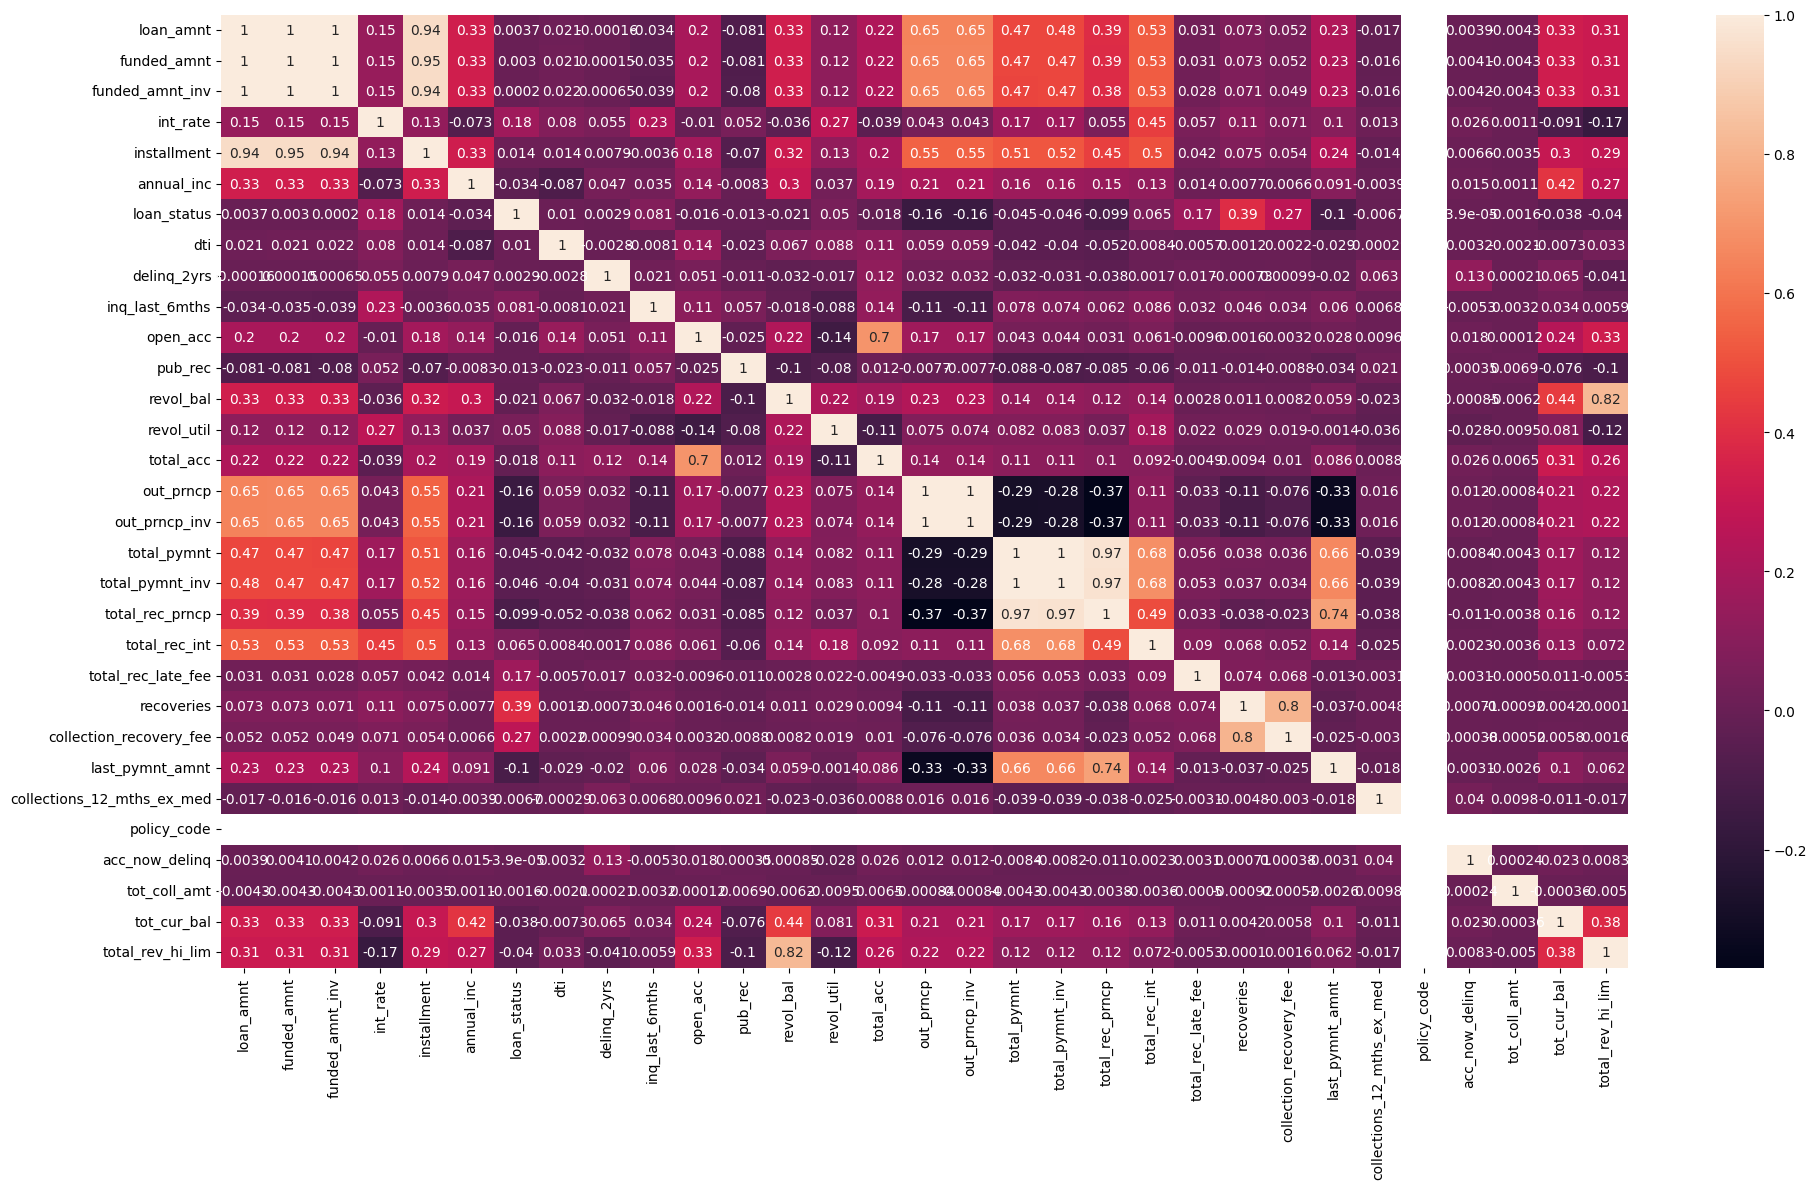

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.tight_layout()

In [31]:
df2.out_prncp_inv

0             0.00
1             0.00
2             0.00
3             0.00
4           766.90
            ...   
887374     7055.47
887375    16933.26
887376    11155.50
887377    10447.31
887378    14110.94
Name: out_prncp_inv, Length: 887379, dtype: float64

In [32]:
#DROPPING Fundedamnt, funded amnt inv, out_prncp_inv, total payment, total payment inv, recoveries, revol_bal,  
df2 = df2.drop(['funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',  'recoveries', 'revol_bal'], axis=1)

In [33]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


In [34]:
df2.inq_last_6mths.unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

In [35]:
df2 = df2.drop('issue_d', axis=1)

In [36]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


In [37]:
### inq_last_6mths
def ordinal(inq_last_6mths):
    if inq_last_6mths==0:
        return '0'
    elif inq_last_6mths > 0 and inq_last_6mths <= 5:
        return '1-5'
    elif inq_last_6mths > 5 and inq_last_6mths <= 10:
        return '6-10'    
    elif inq_last_6mths > 10 and inq_last_6mths <= 15:
        return '11-15'
    elif inq_last_6mths > 15 and inq_last_6mths <= 20:
        return '16-20'
    elif inq_last_6mths > 20 and inq_last_6mths <= 25:
        return '21-25'
    elif inq_last_6mths > 25 and inq_last_6mths <= 30:
        return '26-30'
    else:
        return np.nan

df2['inq_last_6mths'] = df2['inq_last_6mths'].apply(ordinal)

In [38]:
df2['inq_last_6mths'].value_counts()

inq_last_6mths
0        497905
1-5      387752
6-10       1622
11-15        51
16-20        12
21-25         3
26-30         2
Name: count, dtype: int64

In [39]:
#dropping policycode, emptitle, pymnt plan, url, zip_code, addr_state, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d, application_type
df2 = df2.drop(['policy_code', 'emp_title', 'pymnt_plan', 'url', 'zip_code', 'addr_state', 'earliest_cr_line', 
                'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], axis=1)

In [40]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'inq_last_6mths',
       'initial_list_status'],
      dtype='object')


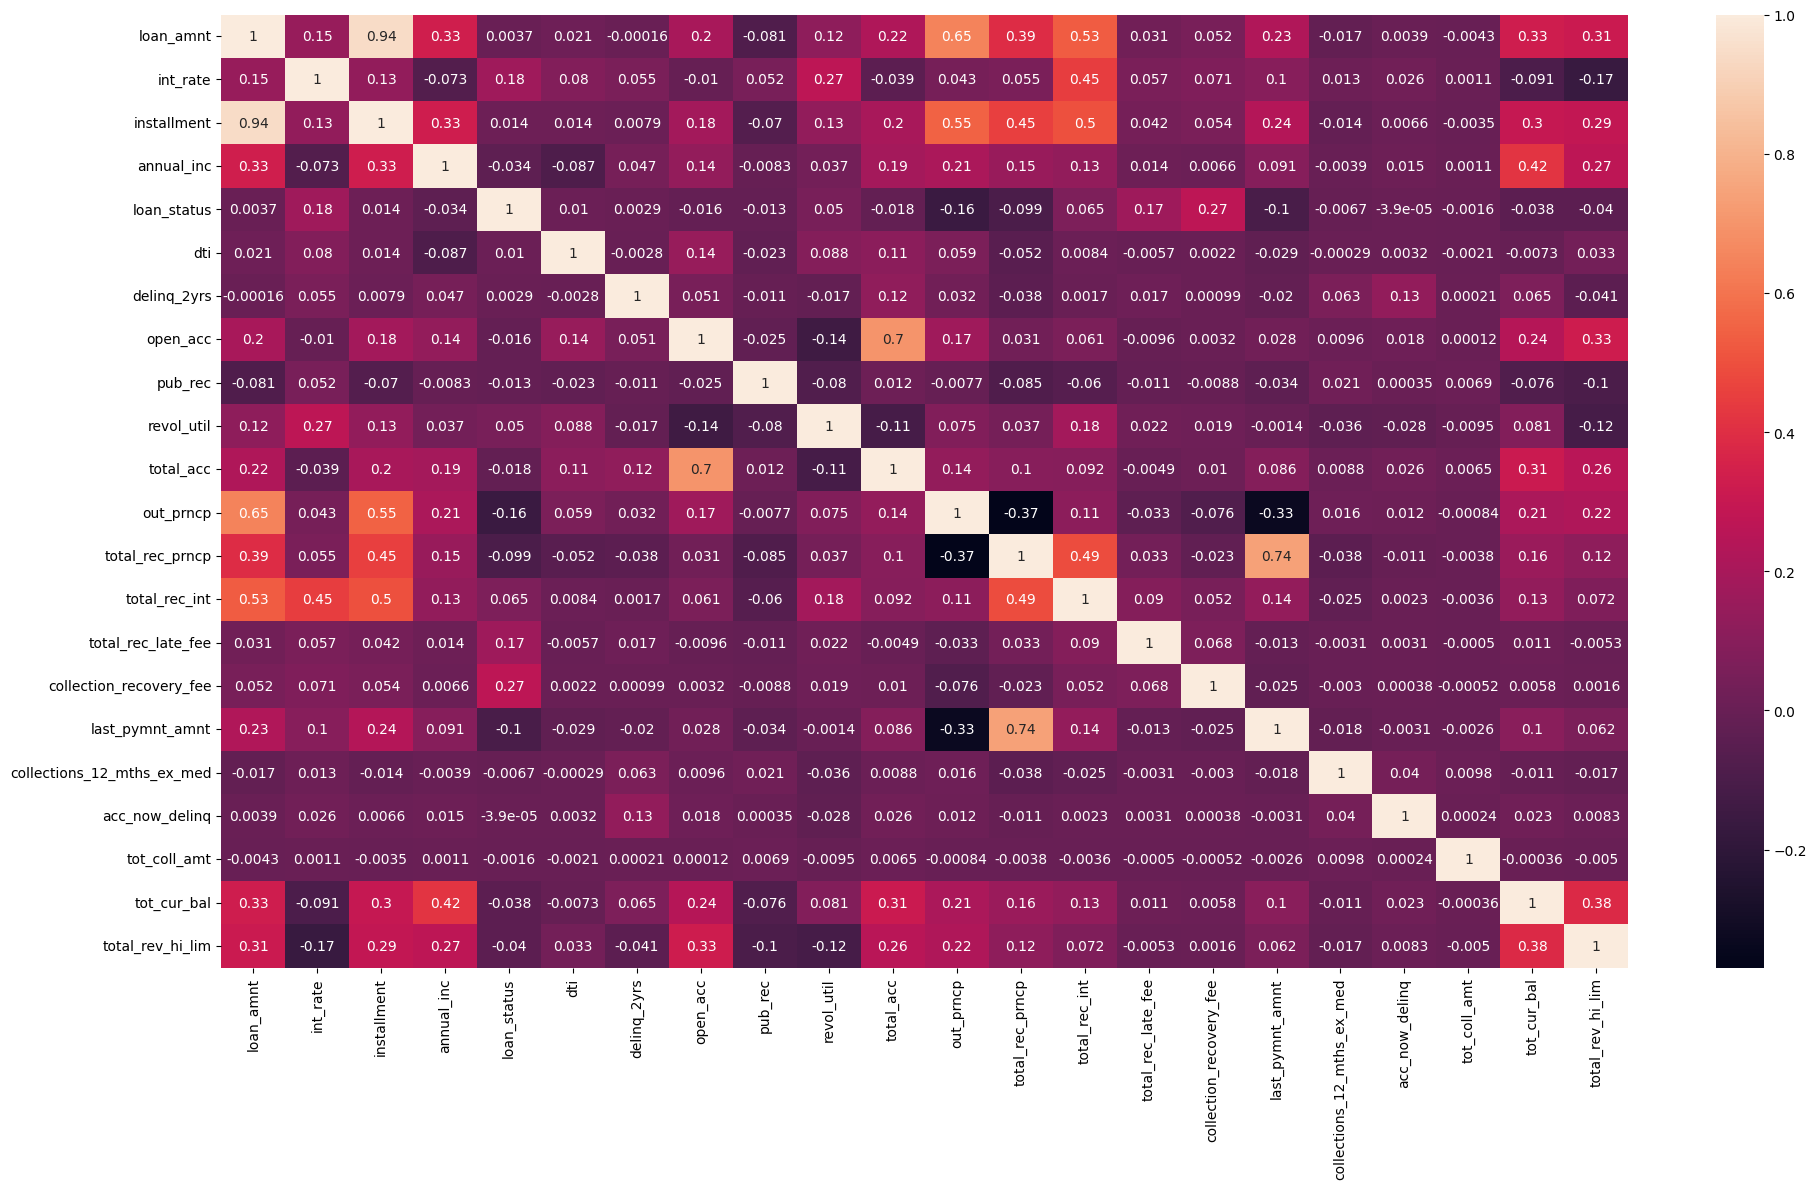

In [55]:
plt.figure(figsize=(20,12))
sns.heatmap(df2[numeric_cols].corr(), annot=True)
plt.tight_layout()

In [53]:
len(df2.columns)

32

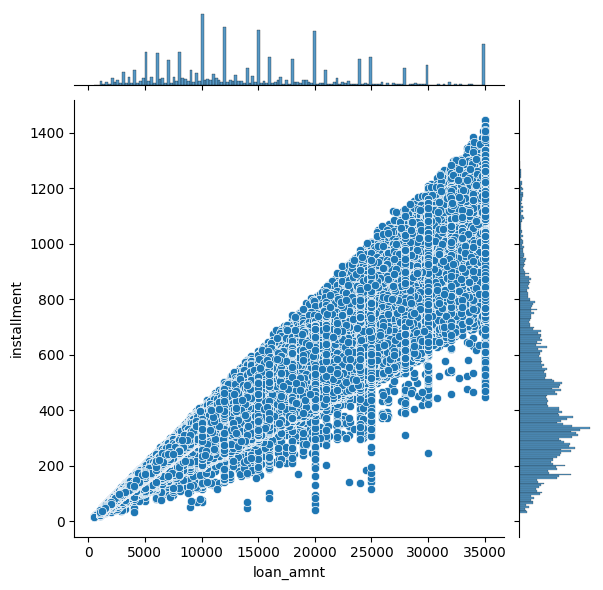

In [57]:
sns.jointplot(x ='loan_amnt', y ='installment', data = df2, hue='loan_status')


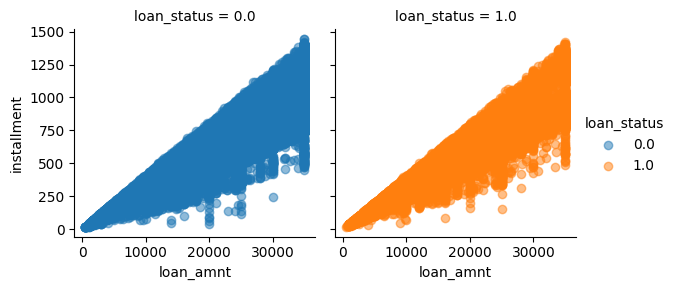

In [66]:
g = sns.FacetGrid(df2, col="loan_status", hue="loan_status")
g.map(plt.scatter, "loan_amnt", "installment", alpha=0.5)
g.add_legend()
plt.show()


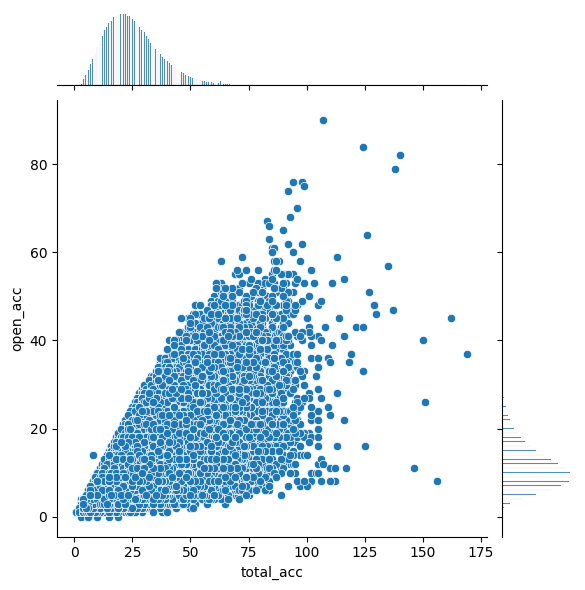

In [58]:
sns.jointplot(x ='total_acc', y ='open_acc', data = df2, hue='loan_status')


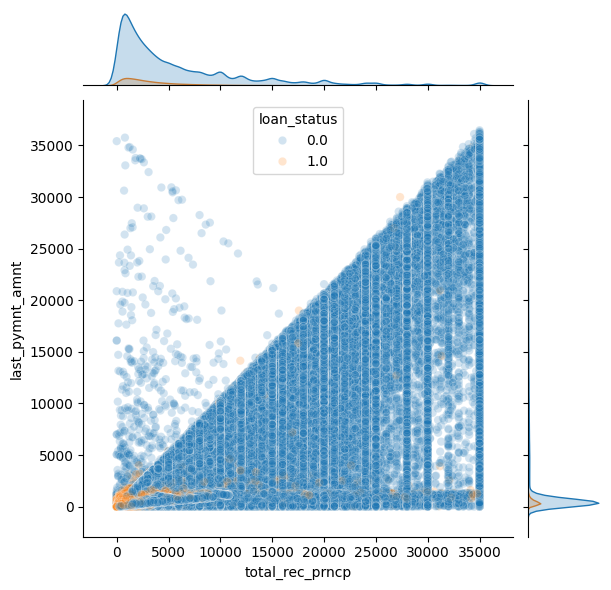

In [65]:
sns.jointplot(x ='total_rec_prncp', y ='last_pymnt_amnt', data = df2, hue='loan_status', alpha=.2)



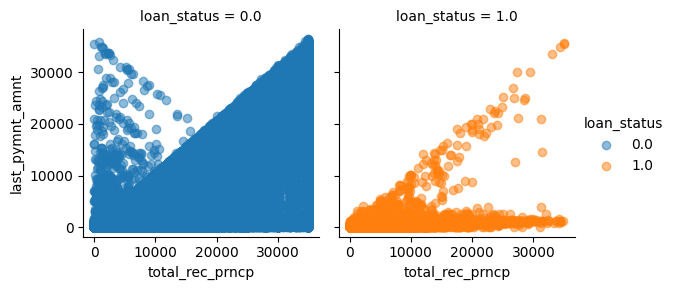

In [63]:
g = sns.FacetGrid(df2, col="loan_status", hue="loan_status")
g.map(plt.scatter, "total_rec_prncp", "last_pymnt_amnt", alpha=0.5)
g.add_legend()
plt.show()
